
## Sandesh Shanbhag

## Task 6

## Prediction using Decision Tree Algorithm

## Importing Libraries

### Importing libraries useful in visualizing the dataset and to perform exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [2]:
dataset=pd.read_csv('iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory Data Analysis

In [3]:
#to get information about the columns in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#to get statastical information of the dataset like mean median
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


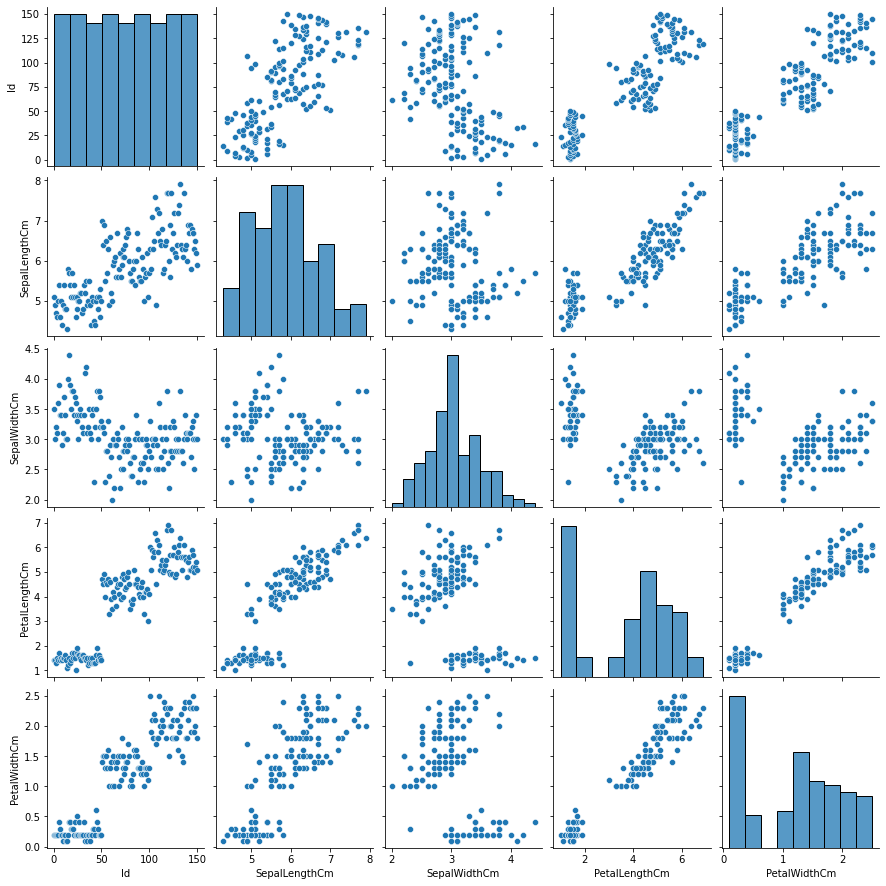

In [5]:
sns.pairplot(dataset)


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Id'),
  Text(0, 1.5, 'SepalLengthCm'),
  Text(0, 2.5, 'SepalWidthCm'),
  Text(0, 3.5, 'PetalLengthCm'),
  Text(0, 4.5, 'PetalWidthCm')])

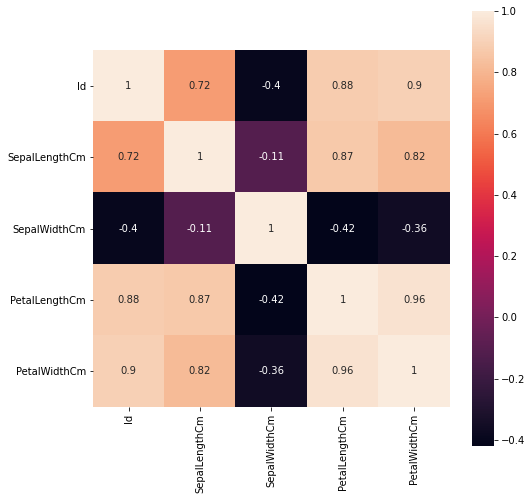

In [6]:

#Heat map to identify the correlation between each columns present in the dataset
#positive values indicate that there is high correlation
#negetive values indicate that there is low correlation
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(),annot=True,square=True)
plt.yticks(rotation=0)

In [9]:
label_encoder=LabelEncoder()
X=dataset.iloc[:,1:5].values
y=label_encoder.fit_transform(dataset['Species'].values)

## Training the model

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=13)

In [11]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)
print("The Model is trained")

The Model is trained


In [12]:
y_pred=dec.predict(x_test)


## Predicting for new column

In [15]:
dec.predict([[ 5.1, 3.5, 1.4, 0.2]])


array([0])

## Evaluating the model

In [16]:

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Confusion Matrix',confusion_matrix(y_test,y_pred))
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))

Confusion Matrix [[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
Accuracy Score 0.9666666666666667
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



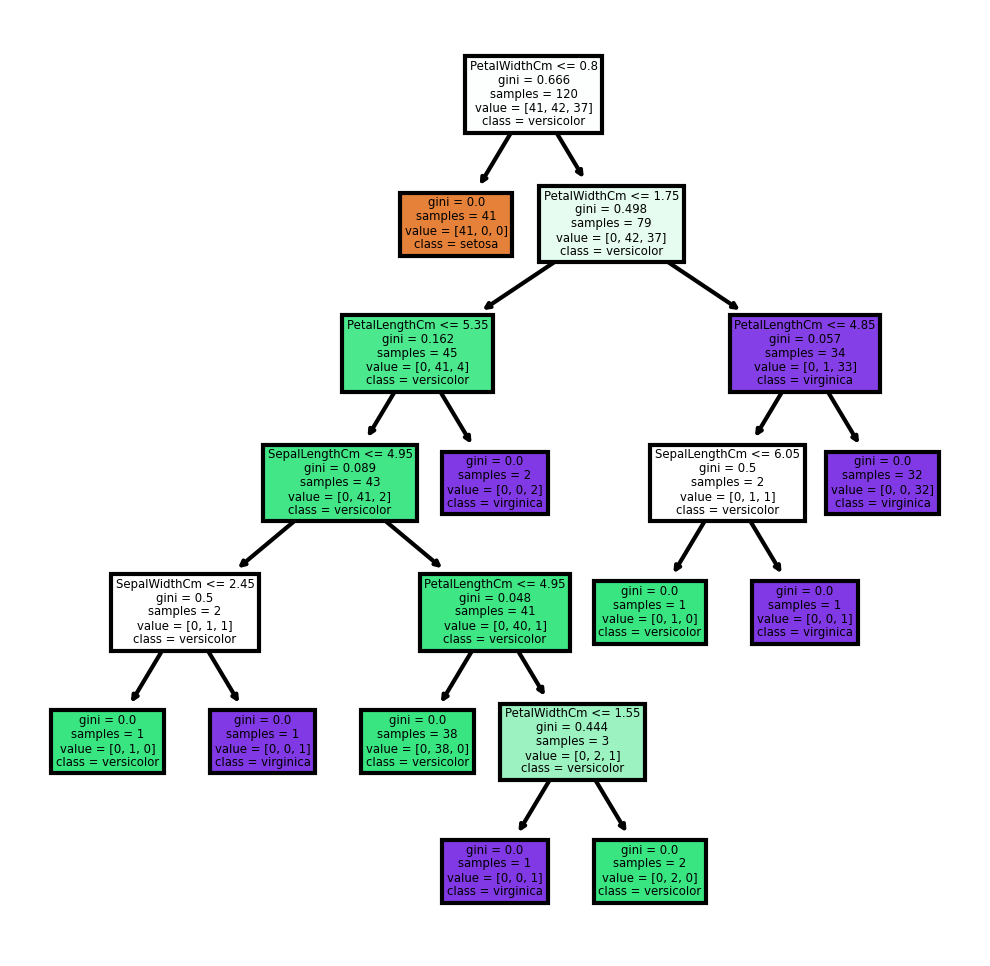

In [17]:
a=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
b=['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(dec,feature_names=a,class_names=b,filled=True)
fig.savefig('imagename.png')